# Pre-processing 

## Base Model

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load data
data = pd.read_csv('../data/interim/data.csv')

# Split target variable and dependents variables
X = data.drop('diagnosis', axis=1)
y = data.diagnosis

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=40)

In [8]:
# Apply the standard scaler to X_train and X_test
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

### Features Selector

Criteron:  
- Select just the attribute with have above mean of importance features caculad by Random Forest with gini_criteron.  

In [9]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=40)

In [10]:
search = clf.fit(X_train_scaler, y_train)
best_params = search.feature_importances_
best_params

array([0.06155338, 0.00945098, 0.04633206, 0.07404403, 0.00101227,
       0.00724527, 0.03698119, 0.10942972, 0.00198043, 0.00130876,
       0.01228876, 0.0015556 , 0.01013767, 0.01673155, 0.00170053,
       0.00119991, 0.00485045, 0.00367004, 0.00169282, 0.00146644,
       0.08114195, 0.01814102, 0.14308994, 0.16505475, 0.00806699,
       0.00742277, 0.02148927, 0.14152048, 0.00488683, 0.00455415])

In [11]:
# Features selected:
sfm = SelectFromModel(clf, threshold='mean', prefit=True)
X_selected = sfm.transform(X_train_scaler)
print(f'Features selected: {X_train.columns[sfm.get_support()]}.')

Features selected: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object').


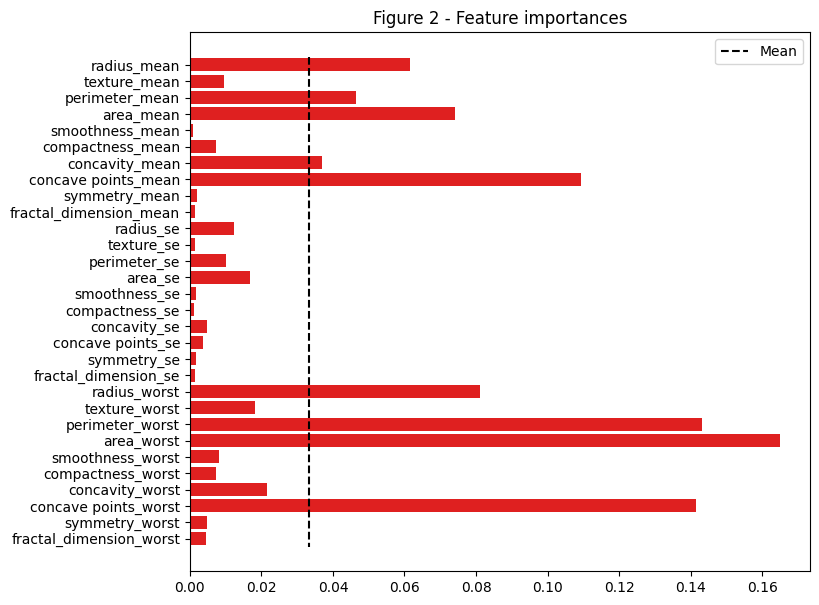

In [12]:
# Plot feature importances
plt.figure(figsize=(8, 7))
sns.barplot(orient='h', y=X.columns, x=clf.feature_importances_, color='r')
plt.vlines(
    np.mean(clf.feature_importances_), 
    ymin=-0.5, 
    ymax=len(X.columns)-0.5, 
    linestyles='--',
    label='Mean',
    color='k'
)
plt.title('Figure 2 - Feature importances')
plt.legend()
plt.show()

In [13]:
# acuracy cross validation to all features: 
avg_acc = cross_val_score(clf, X_train_scaler, y_train, cv=5)
print(f'Average precision with cross validation (5 times) with all variables = {round(avg_acc.mean(), 2)}.')

avg_acc = cross_val_score(clf, X_selected, y_train, cv=5)
print(f'Average accuracy with cross-validation (5-Fold) with the selected variables= {round(avg_acc.mean(), 2)}.')

Average precision with cross validation (5 times) with all variables = 0.95.
Average accuracy with cross-validation (5-Fold) with the selected variables= 0.94.


### Save data to traning models ( Feature Selected)

In [14]:
# save target
np.savetxt('../data/processed/y_train.csv', y_train.values, delimiter=',')
np.savetxt('../data/processed/y_test.csv', y_test.values, delimiter=',')

# Select train data with just "feature select"
X_train_select = sfm.transform(X_train_scaler)
X_test_select = sfm.transform(X_test_scaler)

# Save train and test data with all feature
np.savetxt('../data/processed/X_train_feature.csv', X_train_select, delimiter=',')
np.savetxt('../data/processed/X_test_feature.csv', X_test_select, delimiter=',')

### Save Data to model with all feature

In [15]:
X_train_all = scaler.transform(X_train)
X_test_all = scaler.transform(X_test)

In [16]:
np.savetxt('../data/processed/X_train_all.csv', X_train_all, delimiter=',')
np.savetxt('../data/processed/X_test_all.csv', X_test_all, delimiter=',')